In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

In [16]:
d = {'-1':[8.2, 8, 8.2, 7.9, 8.1, 8],
     "-0.75":[8.3,8.4,8.3,8.2,8.3,8.1],
     "-0.5":[8.9,8.7,8.9,8.4,8.3,8.4],
     "0":[8.5,8.7,8.7,8.7,8.8,8.8],
     "0.5":[8.8,9.1,9.0,8.7,8.9,8.5],
     "1":[8.6,8.5,8.6,8.7,8.8,8.8]}

df = pd.DataFrame(data=d)

In [17]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars = ["-1", "-0.75", "-0.5", "0", "0.5", "1"])
df_melt.columns = ["index", "treatments", "value"]
df_melt
alpha=0.05
df_melt

,index,treatments,value
0,0,-1,8.2
1,1,-1,8.0
2,2,-1,8.2
3,3,-1,7.9
4,4,-1,8.1
5,5,-1,8.0
6,0,-0.75,8.3
7,1,-0.75,8.4
8,2,-0.75,8.3
9,3,-0.75,8.2


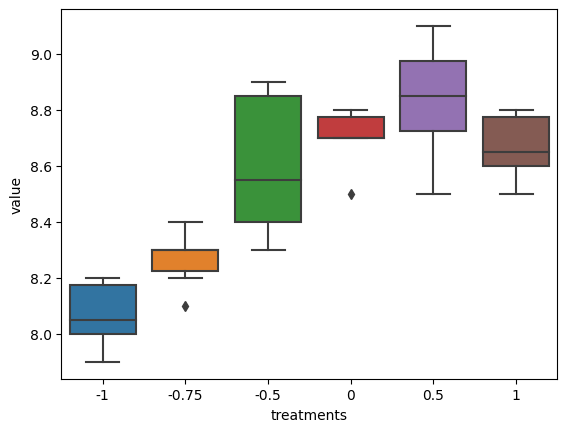

In [18]:
ax = sns.boxplot(x="treatments", y="value", data=df_melt)
plt.show()

In [19]:
fvalue, pvalue = stats.f_oneway(df["-1"], df["-0.75"], df["-0.5"], df["0"], df["0.5"], df["1"])
print(fvalue, pvalue)

18.062499999999993 2.9598791584836326e-08


In [20]:
model = ols('value~treatments', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
pvalue = anova_table['PR(>F)']['treatments']

In [21]:
if pvalue < alpha:
    print("H0 rejcted: There is a significant difference between the treatments")
else:
    print("H0 accepted: There is no significant difference between the treatments")

H0 rejcted: There is a significant difference between the treatments


In [22]:
model.params

Intercept              8.600000
treatments[T.-0.75]   -0.333333
treatments[T.-1]      -0.533333
treatments[T.0]        0.100000
treatments[T.0.5]      0.233333
treatments[T.1]        0.066667
dtype: float64

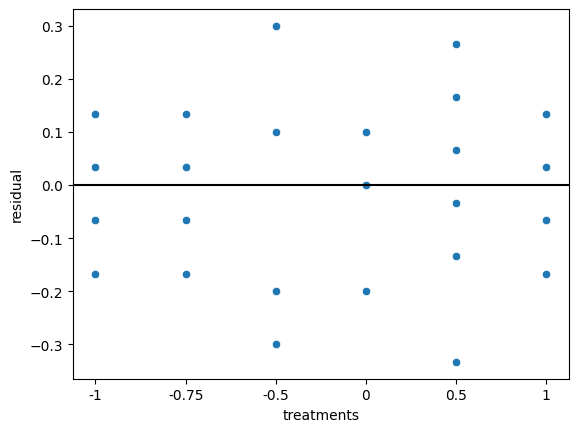

In [41]:
# residual plot
df_melt['residual'] = model.resid

sns.scatterplot(data=df_melt, x='treatments', y='residual')
plt.axhline(y=0, color='k')

In [43]:
plt.figure()
sns.scatterplot(data=df_melt, x='mean', y='residual')

ValueError: Could not interpret value `mean` for parameter `x`

<Figure size 640x480 with 0 Axes>

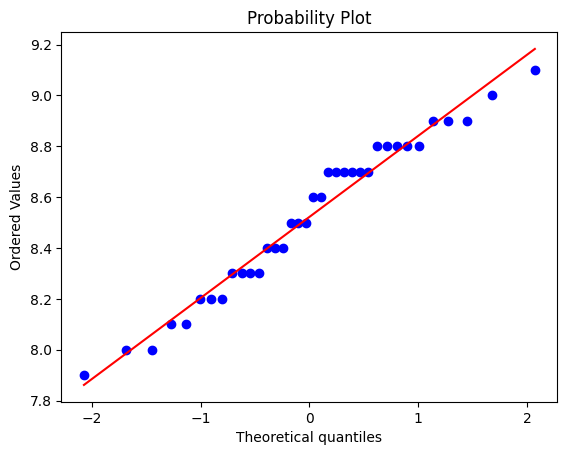

In [38]:
stats.probplot(df_melt['value'], dist="norm", plot=plt)
plt.show()

In [36]:
model.f_test("treatments[T.-1]=treatments[T.-0.75]=0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=15.312499999999996, p=2.6124172732236666e-05, df_denom=30, df_num=2>